In [99]:
# Preparing Cross River Stata SR [Households] Data for Analysis and Visualization

In [100]:
# Import statements
import os
from docx import Document
from docx.shared import Inches

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [101]:
# Read in the data
df = pd.read_stata('C:/Users/Henry/OneDrive/Documents/DATA SCIENCE TUTORIAL/SR ANALYSIS/Demography_Household.dta')
df.head()

,hhnsrrno,state,lga,ward,community,hhsize,sex,geopointlatitude,geopointlongitude,decile,interviewdate,yr,dy,mth,date,pvhh
0,SS/CR/ABI/ILIKE-IMABANA-I/1/0161,CROSS-RIVER,ABI,IMABANA-I,ILIKE-IMABANA-I,2,Female,5.987922,8.019326,7th,2022-01-28,2022,28,01,2022-01-28,1.0
1,SS/CR/ABI/MBOTI_IMABANA II/1/0034,CROSS-RIVER,ABI,IMABANA-II,MBOTI_IMABANA II,6,Male,5.869784,8.120794,3rd,2021-05-26,2021,26,05,2021-05-26,1.0
2,SS/CR/ABI/ENIHOM_EDIBA/1/0049,CROSS-RIVER,ABI,EDIBA,ENIHOM_EDIBA,7,Female,5.874887,8.019598,3rd,2021-06-24,2021,24,06,2021-06-24,1.0
3,SS/CR/ABI/ANONG-EZEKE-EKUREKU-I/1/0002,CROSS-RIVER,ABI,EKUREKU-I,ANONG-EZEKE-EKUREKU-I,5,Female,5.990114,8.040611,4th,2022-01-21,2022,21,01,2022-01-21,1.0
4,SS/CR/ABI/AKAREFOR_EKUREKU I/1/0318,CROSS-RIVER,ABI,EKUREKU-I,AKAREFOR_EKUREKU I,7,Male,5.998078,8.027078,4th,2021-06-14,2021,14,06,2021-06-14,1.0


In [102]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

In [103]:
# Create four new columns
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [104]:
df.head(10)

,hhnsrrno,state,lga,ward,community,hhsize,sex,geopointlatitude,geopointlongitude,decile,interviewdate,yr,dy,mth,date,pvhh,week,month,quarter,year
0,SS/CR/ABI/ILIKE-IMABANA-I/1/0161,CROSS-RIVER,ABI,IMABANA-I,ILIKE-IMABANA-I,2,Female,5.987922,8.019326,7th,2022-01-28,2022,28,01,2022-01-28,1.0,2022-W04,2022-01,2022-Q1,2022
1,SS/CR/ABI/MBOTI_IMABANA II/1/0034,CROSS-RIVER,ABI,IMABANA-II,MBOTI_IMABANA II,6,Male,5.869784,8.120794,3rd,2021-05-26,2021,26,05,2021-05-26,1.0,2021-W21,2021-05,2021-Q2,2021
2,SS/CR/ABI/ENIHOM_EDIBA/1/0049,CROSS-RIVER,ABI,EDIBA,ENIHOM_EDIBA,7,Female,5.874887,8.019598,3rd,2021-06-24,2021,24,06,2021-06-24,1.0,2021-W25,2021-06,2021-Q2,2021
3,SS/CR/ABI/ANONG-EZEKE-EKUREKU-I/1/0002,CROSS-RIVER,ABI,EKUREKU-I,ANONG-EZEKE-EKUREKU-I,5,Female,5.990114,8.040611,4th,2022-01-21,2022,21,01,2022-01-21,1.0,2022-W03,2022-01,2022-Q1,2022
4,SS/CR/ABI/AKAREFOR_EKUREKU I/1/0318,CROSS-RIVER,ABI,EKUREKU-I,AKAREFOR_EKUREKU I,7,Male,5.998078,8.027078,4th,2021-06-14,2021,14,06,2021-06-14,1.0,2021-W24,2021-06,2021-Q2,2021
5,SS/CR/ABI/IKPALEGWA_IMABANA I/1/0006,CROSS-RIVER,ABI,IMABANA-I,IKPALEGWA_IMABANA I,6,Female,5.937460,8.115625,3rd,2021-06-01,2021,01,06,2021-06-01,1.0,2021-W22,2021-06,2021-Q2,2021
6,SS/CR/ABI/EKONGHOLO-IMABANA-II/1/0031,CROSS-RIVER,ABI,IMABANA-II,EKONGHOLO-IMABANA-II,4,Male,5.945735,8.160526,5th,2022-01-25,2022,25,01,2022-01-25,1.0,2022-W04,2022-01,2022-Q1,2022
7,SS/CR/ABI/EGBE ZU/1/0019,CROSS-RIVER,ABI,USUMUTONG,EGBE ZU,5,Male,5.835255,8.008448,5th,2018-12-29,2018,29,12,2018-12-29,1.0,2018-W52,2018-12,2018-Q4,2018
8,SS/CR/ABI/AGBARA/1/0019,CROSS-RIVER,ABI,EKUREKU-II,AGBARA,7,Female,NaN,NaN,5th,2018-01-01,2018,01,01,2018-01-01,1.0,2018-W01,2018-01,2018-Q1,2018
9,SS/CR/ABI/ANOR_IFARA-EKUREKU-II/2/0029,CROSS-RIVER,ABI,EKUREKU-II,ANOR_IFARA-EKUREKU-II,6,Female,5.985020,8.022907,NaN,2022-08-20,2022,20,08,2022-08-20,1.0,2022-W33,2022-08,2022-Q3,2022


In [105]:
# Create new dataframe view of just 2022 data, summed by week
df_by_week_2022 = df[df['year'] == '2022'].groupby(['week']).sum().reset_index()
df_by_week_2022.head()

,week,hhsize,geopointlatitude,geopointlongitude,pvhh
0,2022-W01,29.0,47.068236,61.441590,7.0
1,2022-W02,18705.0,25239.162443,33966.103155,4329.0
2,2022-W03,35115.0,49605.535755,64578.988339,8270.0
3,2022-W04,46103.0,60601.879209,87711.130661,10274.0
4,2022-W05,39289.0,51516.511693,74931.074126,8737.0


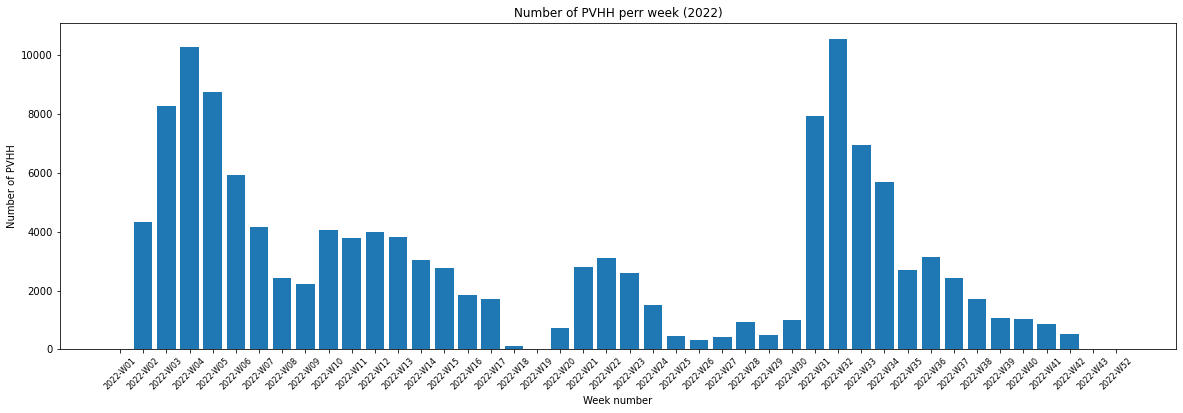

In [115]:
plt.figure(figsize = (20, 6)) # Increase output size
plt.bar(x = df_by_week_2022['week'], height = df_by_week_2022['pvhh'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of PVHH")
plt.title("Number of PVHH perr week (2022)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size

plt.show()

In [9]:
df_by_quarter = df['pvhh'].div(1000)
df_by_quarter.head()

0    0.001
1    0.001
2    0.001
3    0.001
4    0.001
Name: pvhh, dtype: float32

In [10]:
# Group 2017-2022 data by quarter and sum
df_by_quarter = df.groupby(['quarter']).sum().reset_index()

# Format as text, in Thousands
df_by_quarter['number_of_pvhh_formatted'] = df_by_quarter['pvhh'].div(1000).round(1).astype(str) + 'T'

df_by_quarter.head()

,quarter,hhsize,geopointlatitude,geopointlongitude,pvhh,number_of_pvhh_formatted
0,2017-Q4,37721.0,0.000000,0.000000,7018.0,7.0T
1,2018-Q1,49784.0,0.000000,0.000000,10751.0,10.8T
2,2018-Q4,12867.0,15768.736083,22343.906483,2552.0,2.6T
3,2019-Q1,30974.0,40458.342877,59780.088857,6977.0,7.0T
4,2019-Q2,1603.0,1601.211666,2545.423044,299.0,0.3T


In [12]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

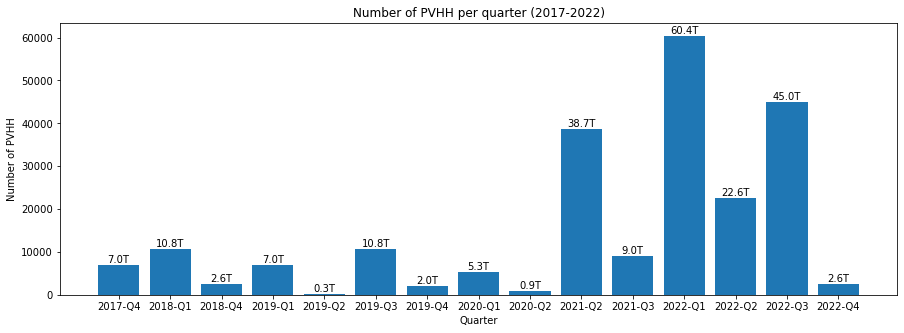

In [59]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['pvhh'])
addlabels(df_by_quarter['quarter'], df_by_quarter['pvhh'], df_by_quarter['number_of_pvhh_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of PVHH')
plt.title('Number of PVHH per quarter (2017-2022)')
plt.show()

In [14]:
# Create two new columns
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,hhsize,geopointlatitude,geopointlongitude,pvhh,number_of_pvhh_formatted,quarter_number,year
0,2017-Q4,37721.0,0.000000,0.000000,7018.0,7.0T,Q4,2017
1,2018-Q1,49784.0,0.000000,0.000000,10751.0,10.8T,Q1,2018
2,2018-Q4,12867.0,15768.736083,22343.906483,2552.0,2.6T,Q4,2018
3,2019-Q1,30974.0,40458.342877,59780.088857,6977.0,7.0T,Q1,2019
4,2019-Q2,1603.0,1601.211666,2545.423044,299.0,0.3T,Q2,2019


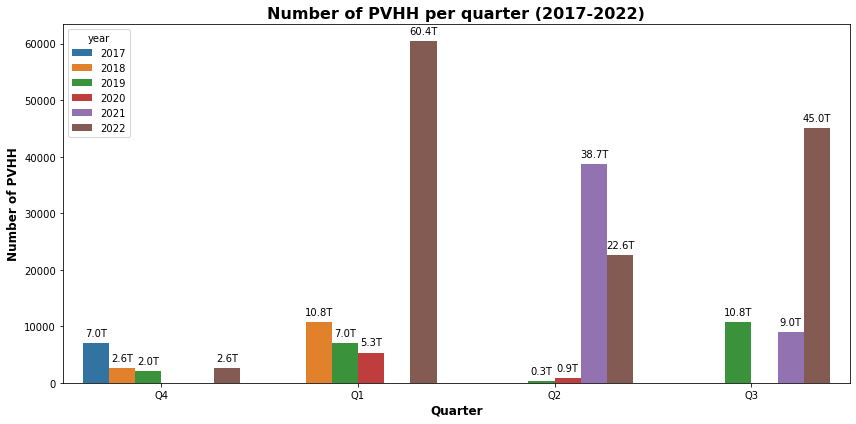

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart
p = sns.barplot(data=df_by_quarter, x='quarter_number', y='pvhh', hue='year')

# Add value annotations to the bars
for b in p.patches:
    p.annotate(str(round(b.get_height() / 1000, 1)) + 'T',
               (b.get_x() + b.get_width() / 2., b.get_height() + 3000),
               ha='center', va='bottom',
               xytext=(0, -12),
               textcoords='offset points')

# Set the labels and title
plt.xlabel("Quarter", fontsize=12, fontweight='bold')
plt.ylabel("Number of PVHH", fontsize=12, fontweight='bold')
plt.title("Number of PVHH per quarter (2017-2022)", fontsize=16, fontweight='bold')

# Adjust the layout and spacing
plt.tight_layout()

# Specify the file paths
image_path = "C:/Users/Henry/OneDrive/Documents/DATA SCIENCE TUTORIAL/SR ANALYSIS/plot_pvhh.png"
doc_path = "C:/Users/Henry/OneDrive/Documents/DATA SCIENCE TUTORIAL/SR ANALYSIS/output_pvhh.docx"

# Save the plot as an image
plt.savefig(image_path, dpi=300)

# Create a new Word document
doc = Document()

# Add a heading
doc.add_heading("PVHH Analysis", level=2)

# Add the plot image to the Word document
doc.add_picture(image_path, width=Inches(6), height=Inches(4))

# Save the Word document
doc.save(doc_path)


In [19]:
df.head()

,hhnsrrno,state,lga,ward,community,hhsize,sex,geopointlatitude,geopointlongitude,decile,interviewdate,yr,dy,mth,date,pvhh,week,month,quarter,year
0,SS/CR/ABI/ILIKE-IMABANA-I/1/0161,CROSS-RIVER,ABI,IMABANA-I,ILIKE-IMABANA-I,2,Female,5.987922,8.019326,7th,2022-01-28,2022,28,01,2022-01-28,1.0,2022-W04,2022-01,2022-Q1,2022
1,SS/CR/ABI/MBOTI_IMABANA II/1/0034,CROSS-RIVER,ABI,IMABANA-II,MBOTI_IMABANA II,6,Male,5.869784,8.120794,3rd,2021-05-26,2021,26,05,2021-05-26,1.0,2021-W21,2021-05,2021-Q2,2021
2,SS/CR/ABI/ENIHOM_EDIBA/1/0049,CROSS-RIVER,ABI,EDIBA,ENIHOM_EDIBA,7,Female,5.874887,8.019598,3rd,2021-06-24,2021,24,06,2021-06-24,1.0,2021-W25,2021-06,2021-Q2,2021
3,SS/CR/ABI/ANONG-EZEKE-EKUREKU-I/1/0002,CROSS-RIVER,ABI,EKUREKU-I,ANONG-EZEKE-EKUREKU-I,5,Female,5.990114,8.040611,4th,2022-01-21,2022,21,01,2022-01-21,1.0,2022-W03,2022-01,2022-Q1,2022
4,SS/CR/ABI/AKAREFOR_EKUREKU I/1/0318,CROSS-RIVER,ABI,EKUREKU-I,AKAREFOR_EKUREKU I,7,Male,5.998078,8.027078,4th,2021-06-14,2021,14,06,2021-06-14,1.0,2021-W24,2021-06,2021-Q2,2021


In [57]:
# Create new dataframe, average by lga
df_by_lga_avg = df.groupby(['lga']).mean().reset_index()
df_by_lga_avg.head()

,lga,hhsize,geopointlatitude,geopointlongitude,pvhh
0,ABI,4.830312,5.898460,8.053623,1.0
1,AKAMKPA,3.919707,5.389992,8.458703,1.0
2,AKPABUYO,4.287603,4.939399,8.454544,1.0
3,BAKASSI,3.553550,5.148394,7.435068,1.0
4,BEKWARRA,3.813777,6.688195,8.906920,1.0


In [88]:
# Format as text, in Thousands
df_by_lga_avg['ave_hhsize_formatted'] = df_by_lga_avg['hhsize'].round()
df_by_lga_avg.head()

,lga,hhsize,geopointlatitude,geopointlongitude,pvhh,ave_hhsize_formatted
0,ABI,4.830312,5.898460,8.053623,1.0,5.0
1,AKAMKPA,3.919707,5.389992,8.458703,1.0,4.0
2,AKPABUYO,4.287603,4.939399,8.454544,1.0,4.0
3,BAKASSI,3.553550,5.148394,7.435068,1.0,4.0
4,BEKWARRA,3.813777,6.688195,8.906920,1.0,4.0


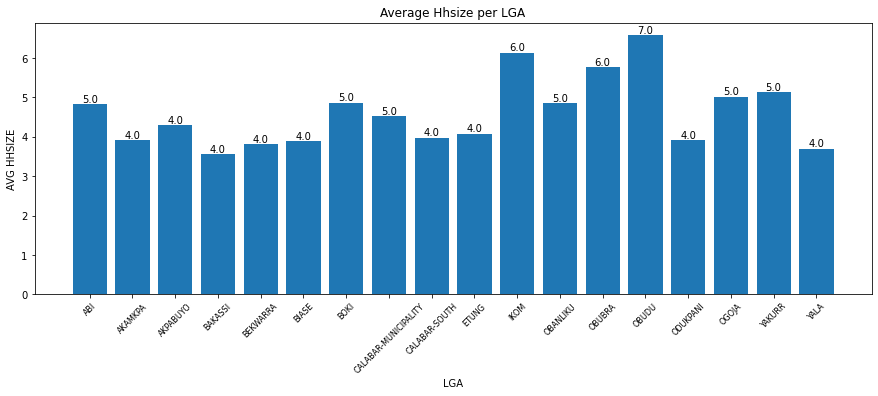

In [90]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_lga_avg['lga'], height = df_by_lga_avg['hhsize'])
addlabels(df_by_lga_avg['lga'], df_by_lga_avg['hhsize'], df_by_lga_avg['ave_hhsize_formatted'])
plt.plot()
plt.xlabel('LGA')
plt.ylabel('AVG HHSIZE')
plt.title('Average Hhsize per LGA')
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size

plt.show()

In [56]:
# Create new dataframe, sum by lga
df_by_lga_sum = df.groupby(['lga']).sum().reset_index()
df_by_lga_sum.head()

,lga,hhsize,geopointlatitude,geopointlongitude,pvhh
0,ABI,61287.0,67584.558201,92278.408363,12688.0
1,AKAMKPA,48232.0,59877.418629,93967.729013,12305.0
2,AKPABUYO,37285.0,37213.434012,63696.536766,8696.0
3,BAKASSI,30127.0,37485.454870,54134.730641,8478.0
4,BEKWARRA,52653.0,88478.132504,117829.646357,13806.0


In [86]:
# Format as text, in Thousands
df_by_lga_avg['ave_hhsize_formatted'] = df_by_lga_avg['hhsize'].round()
df_by_lga_avg.head()

,lga,hhsize,geopointlatitude,geopointlongitude,pvhh,ave_hhsize_formatted
0,ABI,4.830312,5.898460,8.053623,1.0,5.0
1,AKAMKPA,3.919707,5.389992,8.458703,1.0,4.0
2,AKPABUYO,4.287603,4.939399,8.454544,1.0,4.0
3,BAKASSI,3.553550,5.148394,7.435068,1.0,4.0
4,BEKWARRA,3.813777,6.688195,8.906920,1.0,4.0


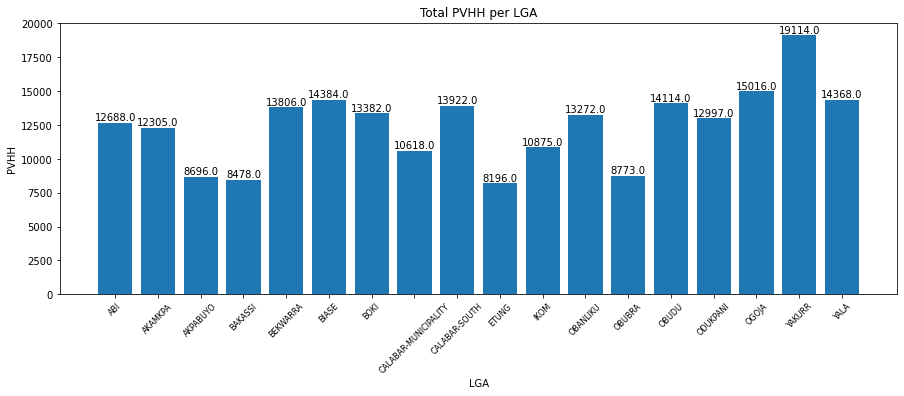

In [123]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_lga_sum['lga'], height = df_by_lga_sum['pvhh'])
addlabels(df_by_lga_sum['lga'], df_by_lga_sum['pvhh'], df_by_lga_sum['pvhh'])

plt.plot()
plt.xlabel('LGA')
plt.ylabel('PVHH')
plt.title('Total PVHH per LGA')
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size
plt.show()

In [16]:
file_path = 'C://Users//Henry//OneDrive//Documents//DATA SCIENCE TUTORIAL//SR ANALYSIS//Demography_Household_python.dta'

# Use the pandas to_stata() function to export data to Stata format
df_by_quarter.to_stata(file_path, write_index=False)

file_path = 'C://Users//Henry//OneDrive//Documents//DATA SCIENCE TUTORIAL//SR ANALYSIS//Demography_Household_python_week.dta'
# Use the pandas to_stata() function to export data to Stata format
df_by_week_2022.to_stata(file_path, write_index=False)

In [51]:
file_path = 'C://Users//Henry//OneDrive//Documents//DATA SCIENCE TUTORIAL//SR ANALYSIS//Demography_Household_python_quarter.csv'

# Use the pandas to_stata() function to export data to Stata format
df_by_quarter.to_csv(file_path, index=False)

file_path = 'C://Users//Henry//OneDrive//Documents//DATA SCIENCE TUTORIAL//SR ANALYSIS//Demography_Household_python_week.csv'

# Use the pandas to_stata() function to export data to Stata format
df_by_week_2022.to_csv(file_path, index=False)